In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('data/druguse.tsv', sep='\t')

In [4]:
df.head()

,CASEID,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,IIEMPSTY,II2EMSTY,EMPSTAT4,IIEMPST4,II2EMST4,PDEN00,COUTYP2,ANALWT_C,VESTR,VEREP
0,1,50886467,2,4,4,991,9991,91,91,91,...,1,1,99,9,9,2,2,1275.597449,30054,2
1,2,13766883,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,2,2,5191.071173,30031,1
2,3,17772877,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,3,3,419.742011,30056,2
3,4,45622817,1,99,99,13,9999,99,2,93,...,1,1,2,1,1,2,2,1449.303889,30054,1
4,5,17239390,1,99,99,11,9999,99,4,93,...,1,1,1,1,1,1,1,15344.293577,30012,2


In [ ]:
#HALLUCINOGENS

hall = ['HALFLAG', 'HALYR', 'HALMON', 'LSDFLAG', 'LSDYR', 'LSDMON', 'PCPFLAG', 'PCPYR', 'PCPMON', 'ECSFLAG', 'ECSYR', 'ECSMON', 'PEYOTE2', 'MESC2', 'PSILCY2', 'HALYDAYS', 'HALMDAYS', 'FUHAL18', 'FUHAL21', 'FULSD18', 'FULSD21', 'FUPCP18', 'FUPCP21', 'FUECS18', 'FUECS21', 'LSLAST', 'TOTHALL']


In [ ]:
halldf = df[['HALFLAG', 'HALYR', 'HALMON', 'LSDFLAG', 'LSDYR', 'LSDMON', 'PCPFLAG', 'PCPYR', 'PCPMON', 'ECSFLAG', 'ECSYR', 'ECSMON', 'PEYOTE2', 'MESC2', 'PSILCY2', 'HALYDAYS', 'HALMDAYS', 'FUHAL18', 'FUHAL21', 'FULSD18', 'FULSD21', 'FUPCP18', 'FUPCP21', 'FUECS18', 'FUECS21', 'LSLAST', 'TOTHALL']].copy()

In [3]:
#Tabacco vs. Depression
ever_used = df[['CIGFLAG', 'AMDELT']]
cig_dep = ever_used[ever_used.AMDELT > 0]
cig_yes_dep_yes = cig_dep[(cig_dep.CIGFLAG == 1) & (cig_dep.AMDELT == 1)]
cig_yes_dep_no = cig_dep[(cig_dep.CIGFLAG == 1) & (cig_dep.AMDELT == 2)]
cig = len(cig_yes_dep_yes) + len(cig_yes_dep_no)
cig_yes_dep_yes_percent = len(cig_yes_dep_yes) / cig
cig_no_dep_yes = cig_dep[(cig_dep.CIGFLAG == 0) & (cig_dep.AMDELT == 1)]
cig_no_dep_no = cig_dep[(cig_dep.CIGFLAG == 0) & (cig_dep.AMDELT == 2)]
no_cig = len(cig_no_dep_no) + len(cig_no_dep_yes)
cig_no_dep_yes_percent = len(cig_no_dep_yes) / no_cig 

In [14]:
grouped = cig_dep.groupby(['CIGFLAG', 'AMDELT'])
grouped.size()

CIGFLAG  AMDELT
0        1          1476
         2         11625
1        1          4110
         2         20380
dtype: int64

In [15]:
#Alcohol vs. Depression
ever_used = df[['ALCFLAG', 'AMDELT']]
alc_dep = ever_used[ever_used.AMDELT > 0]
alc_yes_dep_yes = alc_dep[(alc_dep.ALCFLAG == 1) & (alc_dep.AMDELT == 1)]
alc_yes_dep_no = alc_dep[(alc_dep.ALCFLAG == 1) & (alc_dep.AMDELT == 2)]
alc = len(alc_yes_dep_yes) + len(alc_yes_dep_no)
alc_yes_dep_yes_percent = len(alc_yes_dep_yes) / alc
alc_no_dep_yes = alc_dep[(alc_dep.ALCFLAG == 0) & (alc_dep.AMDELT == 1)]
alc_no_dep_no = alc_dep[(alc_dep.ALCFLAG == 0) & (alc_dep.AMDELT == 2)]
no_alc = len(alc_no_dep_no) + len(alc_no_dep_yes)
alc_no_dep_yes_percent = len(alc_no_dep_yes) / no_alc 

In [16]:
alc_no_dep_yes_percent

0.08669686985172982

In [17]:
alc_yes_dep_yes_percent

0.15778219031617535

In [18]:
#Marijuana vs. Depression
ever_used = df[['MRJFLAG', 'AMDELT']]
mrj_dep = ever_used[ever_used.AMDELT > 0]
mrj_yes_dep_yes = mrj_dep[(mrj_dep.MRJFLAG == 1) & (mrj_dep.AMDELT == 1)]
mrj_yes_dep_no = mrj_dep[(mrj_dep.MRJFLAG == 1) & (mrj_dep.AMDELT == 2)]
mrj = len(mrj_yes_dep_yes) + len(mrj_yes_dep_no)
mrj_yes_dep_yes_percent = len(mrj_yes_dep_yes) / mrj
mrj_no_dep_yes = mrj_dep[(mrj_dep.MRJFLAG == 0) & (mrj_dep.AMDELT == 1)]
mrj_no_dep_no = mrj_dep[(mrj_dep.MRJFLAG == 0) & (mrj_dep.AMDELT == 2)]
no_mrj = len(mrj_no_dep_no) + len(mrj_no_dep_yes)
mrj_no_dep_yes_percent = len(mrj_no_dep_yes) / no_mrj 

In [19]:
mrj_no_dep_yes_percent

0.10259866292861763

In [20]:
mrj_yes_dep_yes_percent

0.19340440056713754

In [50]:
#Hallucinogens vs. Depression
ever_used = df[['HALYR', 'MHSUITHK']]
hal_dep = ever_used[ever_used.MHSUITHK >0]
hal_yes_dep_yes = hal_dep[(hal_dep.HALYR == 1) & (hal_dep.MHSUITHK == 1)]
hal_yes_dep_no = hal_dep[(hal_dep.HALYR == 1) & (hal_dep.MHSUITHK == 0)]
hal = len(hal_yes_dep_yes) + len(hal_yes_dep_no)
hal_yes_dep_yes_percent = len(hal_yes_dep_yes) / hal
hal_no_dep_yes = hal_dep[(hal_dep.HALYR == 0) & (hal_dep.MHSUITHK == 1)]
hal_no_dep_no = hal_dep[(hal_dep.HALYR == 0) & (hal_dep.MHSUITHK == 0)]
no_hal = len(hal_no_dep_no) + len(hal_no_dep_yes)
hal_no_dep_yes_percent = len(hal_no_dep_yes) / no_hal

In [51]:
hal_no_dep_yes_percent

1.0

In [52]:
hal_yes_dep_yes_percent

1.0

In [59]:
consumers = (16, 20, 22)
non_consumers = (11, 12, 7)
n_groups = 3
bar_width = 0.35
opacity = 0.8

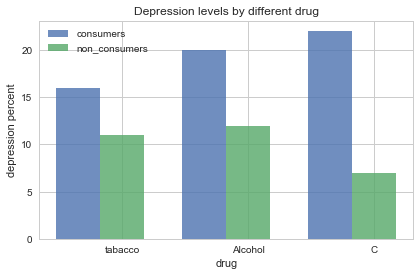

In [61]:
fig, ax = plt.subplots()
index = np.arange(n_groups)
rects1 = plt.bar(index, consumers, bar_width,
                 alpha=opacity,
                 color='b',
                 label='consumers')
 
rects2 = plt.bar(index + bar_width, non_consumers, bar_width,
                 alpha=opacity,
                 color='g',
                 label='non_consumers')
plt.xlabel('drug')
plt.ylabel('depression percent')
plt.title('Depression levels by different drug')
plt.xticks(index + bar_width, ('tabacco', 'Alcohol', 'C', 'D'))
plt.legend()
 
plt.tight_layout() 

Text(0.5,1,'Programming language usage')

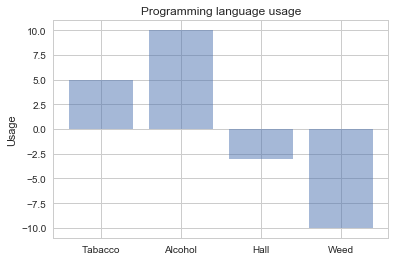

In [62]:
objects = ('Tabacco', 'Alcohol', 'Hall', 'Weed')
y_pos = np.arange(len(objects))
performance = [5, 10, -3, -10]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

In [79]:
X = cig_dep[['CIGFLAG']]
y = cig_dep['AMDELT']
model = LogisticRegression()
model.fit(X, y)
prediction = model.predict(X)

In [90]:
model = LogisticRegression()

In [91]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
prediction = model.predict(X)

In [93]:
prediction

array([2, 2, 2, ..., 2, 2, 2])

In [94]:
model.score(X, y)

0.8514006012077359

In [95]:
model.predict_proba(X)

array([[0.1128557 , 0.8871443 ],
       [0.1128557 , 0.8871443 ],
       [0.16780479, 0.83219521],
       ...,
       [0.1128557 , 0.8871443 ],
       [0.1128557 , 0.8871443 ],
       [0.16780479, 0.83219521]])

In [96]:
model.coef_

array([[-0.46063192]])

In [98]:
model.decision_function(X)

array([2.0618976 , 2.0618976 , 1.60126568, ..., 2.0618976 , 2.0618976 ,
       1.60126568])